# Introduction

## Problem Statement
Maldives has a divorce rate of 10.97% per 1000 inhabitants per year, Belarus 4.63% and the US 4.34%, and the numbers continue to rise across different regions of the world. With advancement in data exploration, it is possible to predict whether a marriage will fail or succeed. 

The task is to uncover what makes a relationships last or break

### About Dataset
This dataset contains data about 150 couples with their corresponding Divorce Predictors Scale variables (DPS) on the basis of Gottman couples therapy.
The couples are from various regions of Turkey wherein the records were acquired from face-to-face interviews from couples who were already divorced or happily married.
All responses were collected on a 5 point scale (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always).

## Type of problem

This is a Supervised machine learning problem, Classification to be precise

### Target Variable
**0 : NOT DIVORCED**

**1: DIVORCED**

## Importing Libraries

In [2]:
#Numerical python library
import numpy as np
#Python Dataframe library
import pandas as pd
#Python visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as pltic
import seaborn as sns
#Warnings ignore function
import warnings
warnings.filterwarnings('ignore')

# Correlation library for nominal variables
from dython.nominal import associations

### Importing the dataset

In [3]:
#Divorce Dataset
data = pd.read_csv('divorce_data.csv', sep = ';')
#Feature description
with open('reference.tsv') as file:
    info = file.readlines()

In [4]:
#First 10 Feature description
info[1:10]

['1|If one of us apologizes when our discussion deteriorates, the discussion ends.\n',
 '2|I know we can ignore our differences, even if things get hard sometimes.\n',
 '3|When we need it, we can take our discussions with my spouse from the beginning and correct it.\n',
 '4|When I discuss with my spouse, to contact him will eventually work.\n',
 '5|The time I spent with my wife is special for us.\n',
 "6|We don't have time at home as partners.\n",
 '7|We are like two strangers who share the same environment at home rather than family.\n',
 '8|I enjoy our holidays with my wife.\n',
 '9|I enjoy traveling with my wife.\n']

### Gathering info about the dataset

In [4]:
#First three individual data of the dataset
data.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1


In [5]:
#Divorce dataset shape
data.shape

(170, 55)

#### Observation
The dataset consist of 170 indiviual data and 55 features, the target variable included.

## Checking for Missing values

In [6]:
data.isnull().sum().sum()

0

#### Observation
The dataset contains no missing values.

## Droping Duplicate values

In [7]:
data.drop_duplicates(keep='last', inplace = True)

In [8]:
data.shape

(150, 55)

#### Observation
The dataset contains 20 duplicate values. This values have been droped to avoid repetition of the same data entry which will have no impact the classification model.

## Checking for the level of variance in each columns

In [9]:
data.nunique().head()

Q1    5
Q2    5
Q3    5
Q4    5
Q5    5
dtype: int64

#### Observation
This analysis above shows that all the columns in the data consist of 5 unique values. This analysis is necessary in order to identify and delete columns with 1 unique value as it will not contribute to the classification model.

# Analysis of Target Variable

In [10]:
data['Divorce'].value_counts(normalize = True)

0    0.56
1    0.44
Name: Divorce, dtype: float64

[]

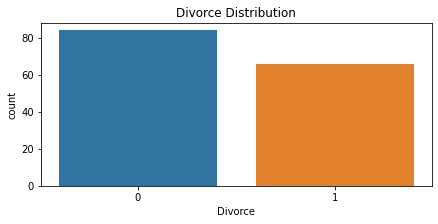

In [11]:
plt.figure(figsize = (7,3))
sns.countplot(data['Divorce'])
plt.title('Divorce Distribution')
plt.plot()

#### Observation
The analysis above shows that 56% of the dataset are not divorced while the other 44% got a divorce. This dataset seems to be a little bit unbalance but it is okay for modelling.

# Analysis of the First 5 Questions

# Q1 

#### If one of us apologizes when our discussion deteriorates, the discussion ends?

In [12]:
pd.DataFrame(data.groupby('Divorce').Q1.value_counts(normalize = True)).unstack()

Q1                                        
Q1              0         1         2         3         4
Divorce                                                  
0        0.785714  0.095238  0.071429  0.023810  0.023810
1        0.015152  0.015152  0.121212  0.515152  0.333333

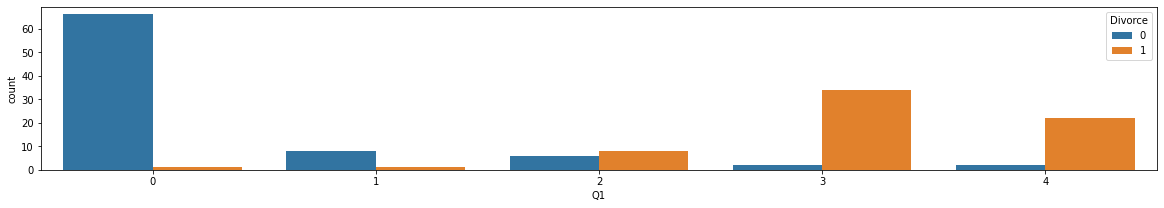

In [13]:
plt.figure(figsize = (20,3))
sns.countplot(data.Q1, hue = data.Divorce)
plt.show()

### Observation 
The analysis above shows that approximately **79%** of those who stayed in their marriage **never** end their discussions when their discussion deteriorates and one of them apologizes.

On the other hand, approximately **52%** of those who got a divorce **frequently** end their discussions when their discussion deteriorates and one of them apologizes.

# Q2

#### I know we can ignore our differences, even if things get hard sometimes?

In [14]:
pd.DataFrame(data.groupby('Divorce').Q2.value_counts(normalize = True)).unstack()

Q2                                        
Q2              0         1         2         3         4
Divorce                                                  
0        0.654762  0.250000  0.059524  0.035714       NaN
1        0.030303  0.030303  0.257576  0.439394  0.242424

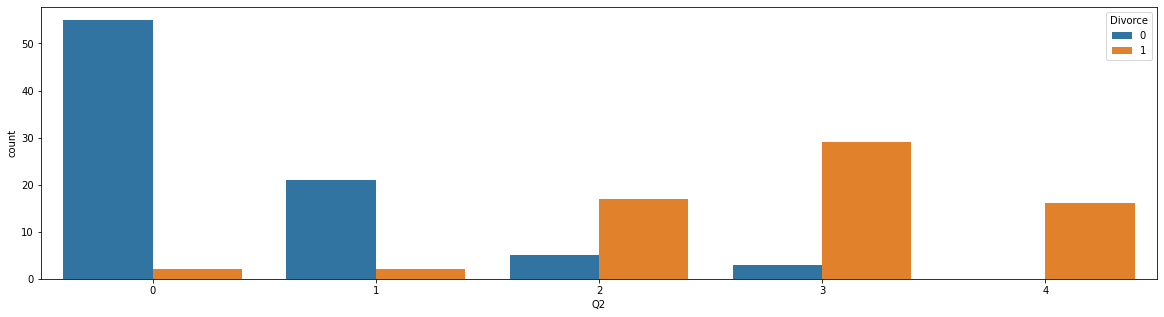

In [15]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q2, hue = data.Divorce)
plt.show()

#### Observation 
The analysis above shows that approximately **65%** of those who stayed in their marriage **never** ignore their differences, even if things get hard sometimes. Also, **none** of them **always** ignore their differences, even if things get hard sometimes.

On the other hand, approximately **44%** of those who got a divorce **frequently** ignore their differences, even if things get hard sometimes. Approximately **26%** of them **averagely** and **24%** of them **always** ignore their differences, even if things get hard sometimes.

## Q3

#### When we need it, we can take our discussions with my spouse from the beginning and correct it.

In [16]:
pd.DataFrame(data.groupby('Divorce')['Q3'].value_counts(normalize = True)).unstack()

Q3                                        
Q3              0         1         2         3         4
Divorce                                                  
0        0.595238  0.226190  0.130952  0.035714  0.011905
1             NaN  0.060606  0.196970  0.530303  0.212121

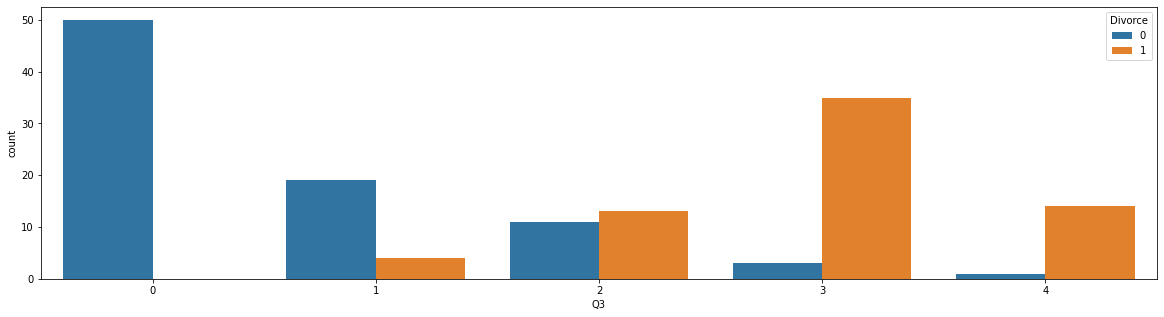

In [17]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q3, hue = data.Divorce)
plt.show()

#### Observation 
The analysis above shows that approximately **60%** of those who stayed in their marriage **never** take their discussions with their spouse from the beginning and correct it when they need to. Also, approximately **23%** of those who stayed in their marriage **Seldomly** take their discussions with their spouse from the beginning and correct it when they need to

On the other hand, **none** of those who got a divorce **never** take their discussions with their spouse from the beginning and correct it when they need to. Also, approximately **53%** of those who got a divorce **frequently** take their discussions with their spouse from the beginning and correct it when they need to

# Q4

#### When I discuss with my spouse, to contact him will eventually work.

In [18]:
pd.DataFrame(data.groupby('Divorce')['Q4'].value_counts(normalize = True)).unstack()

Q4                                        
Q4              0         1         2         3         4
Divorce                                                  
0        0.845238  0.107143  0.011905       NaN  0.035714
1        0.030303  0.045455  0.287879  0.409091  0.227273

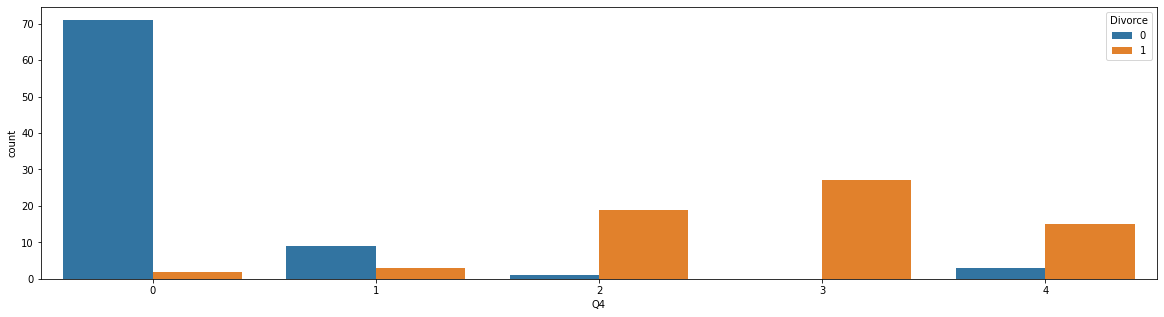

In [19]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q4, hue = data.Divorce)
plt.show()

#### Observation 
The analysis above shows that approximately **85%** of the wives of those who stayed in their marriage showed that when they discuss with their spouse, to contact him **never** work. Also, **none** of them showed that when they discuss with their spouse, to contact him **frequenly** work.

The analysis above shows that approximately **41%** of the wives of those who got a divorce showed that when they discuss with their spouse, to contact him **frequently** work. Also, approximately **29%** of them showed that when they discuss with their spouse, to contact him **averagely** work.

# Q5

### The time I spent with my wife is special for us.

In [20]:
pd.DataFrame(data.groupby('Divorce')['Q5'].value_counts(normalize = True)).unstack()

Q5                                   
Q5              0         1         2    3         4
Divorce                                             
0        0.916667  0.059524  0.023810  NaN       NaN
1        0.045455  0.075758  0.090909  0.5  0.287879

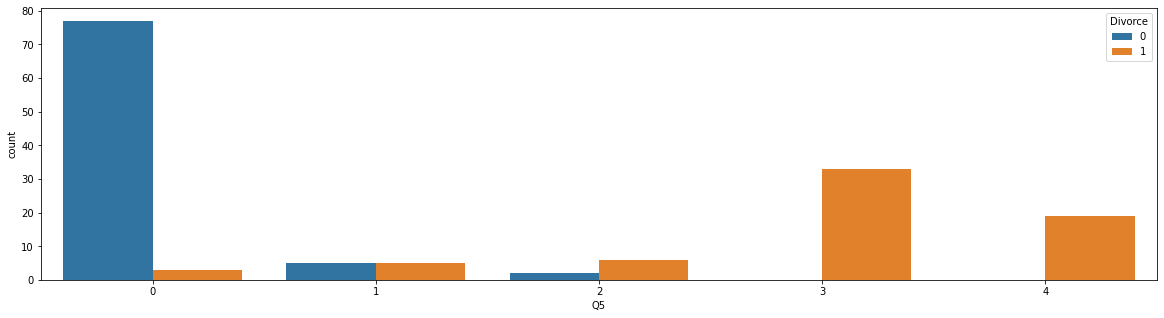

In [21]:
plt.figure(figsize = (20,5))
sns.countplot(data.Q5, hue = data.Divorce)
plt.show()

#### Observation 
The analysis above shows that approximately **92%** of the husbands of those who stayed in their marriage **never** agree that the time they spent with their wife is special for them. Also, **none** of them didn't choose 
**frequently** and **always** as their answer.

The analysis above shows that approximately **50%** of the husbands of those who got a divorce agree that the time they spent with their wife is **frequently** special for them.

## Associations between the First 5 features/question and the Target variable

### Note
We avoid using the normal correlation method, data.cor(), as it is best used to explain the linear relationship between numerical variables. But the features we have in this dataset are categorical variables encoded as integers. Although the encoding numbers seem to be greater than each other, the variables are actualy nominal as an answer to any question isn't greater than any other answers.

<Figure size 7200x504 with 0 Axes>

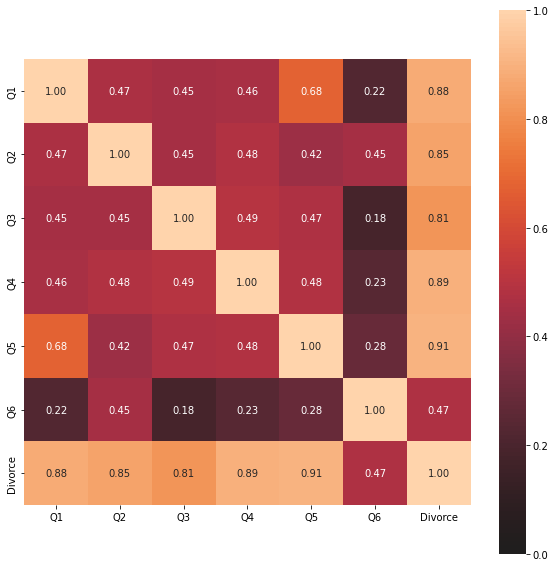

In [23]:
plt.figure(figsize = (100,7))
associations(data.iloc[:, [0,1,2,3,4,5,-1]],figsize = (10,10), nominal_columns = 'all')
plt.show()

### Observation
The association plot above shows that the first five features/questions are an important predictor of the target variable as they all have an association value greater than 80%.

## Distribution of the dataset based on the target

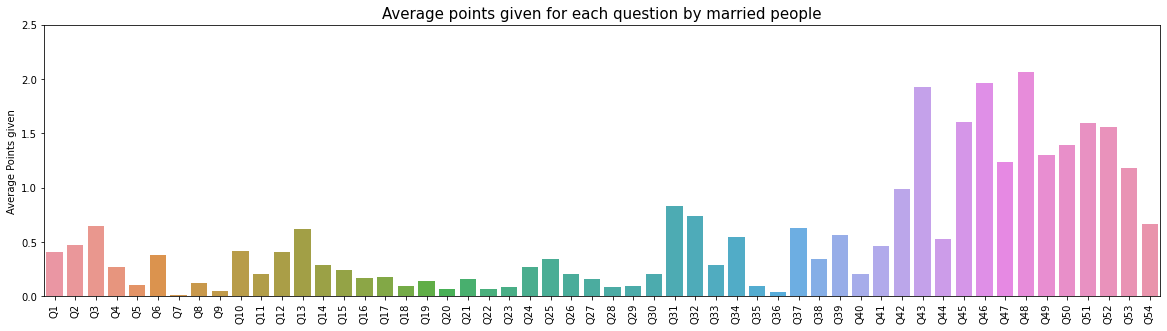

In [24]:
#plot a barchat showing the average point given for each quation by married people
plt.figure(figsize= (20,5))
plt.xticks(rotation = 90)
sns.barplot(x= data[data['Divorce'].eq(0)].columns[:-1], y= data[data['Divorce'].eq(0)].drop('Divorce', axis = 1).mean())
plt.ylim(0, 2.5)
plt.ylabel("Average Points given")
plt.title('Average points given for each question by married people', fontsize = 15)
plt.show()

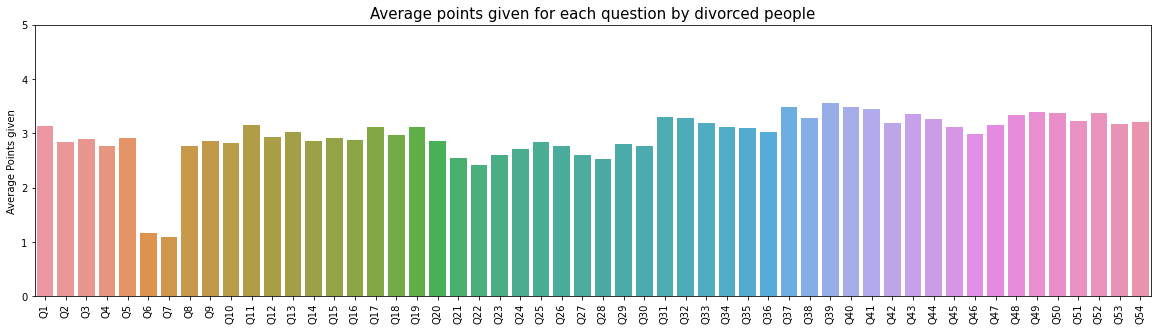

In [25]:
#plot a barchat showing the average point given for each quation by divorcedpeople
plt.figure(figsize= (20,5))
plt.xticks(rotation = 90)
sns.barplot(x= data[data['Divorce'].eq(1)].columns[:-1], y= data[data['Divorce'].eq(1)].drop('Divorce', axis = 1).mean())
plt.ylim(0, 5)
plt.ylabel("Average Points given")
plt.title('Average points given for each question by divorced people', fontsize = 15)
plt.show()

#### Observation
Studying the plots in respect to the qusetions asked, we see that the data distribution of the married and divorced couple are significantly different. This helps the model easily classify the dataset.

### Data Distribution of all the features

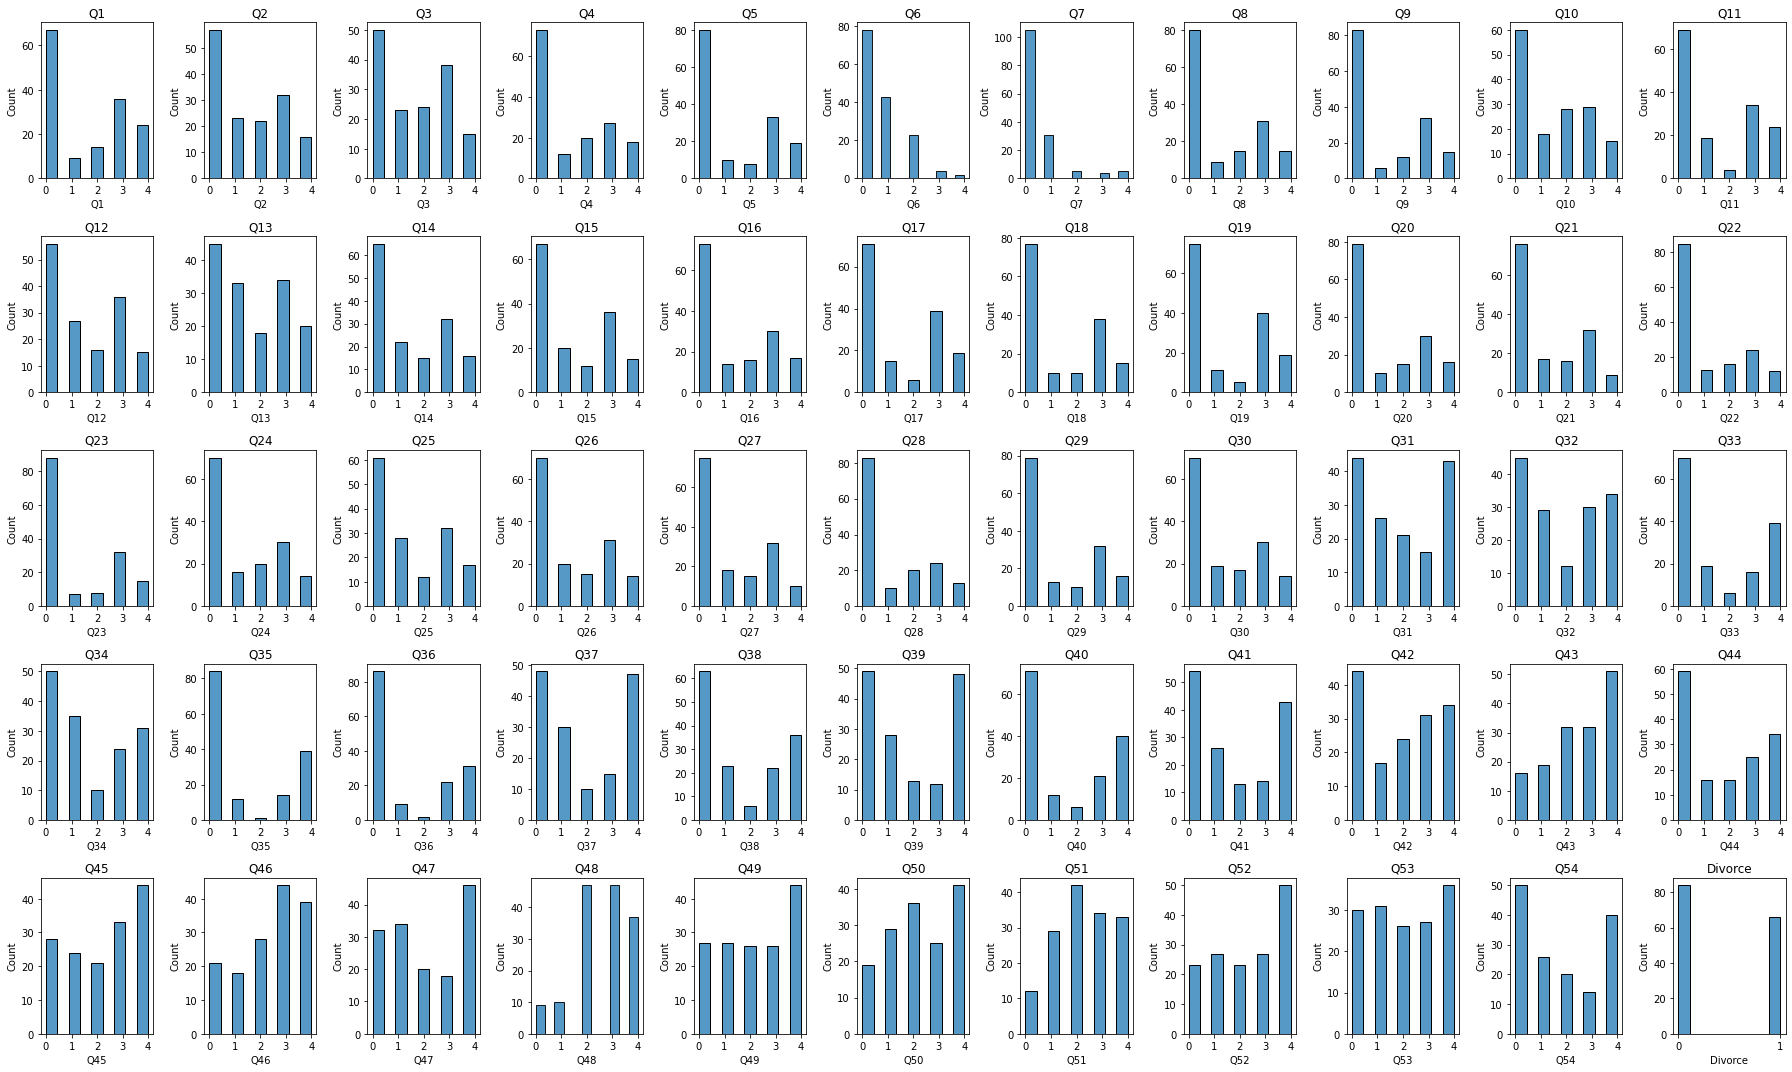

In [30]:
eda_data= data.copy()

plt.figure(figsize=(25,15))
for i, column in enumerate(eda_data.columns):
    plt.subplot(5,11,i + 1)
    sns.histplot(data= eda_data[column])
    plt.title(column)
    loc= pltic.MultipleLocator(base = 1.0)
    plt.subplot(5,11,i + 1).xaxis.set_major_locator(loc)
plt.tight_layout()
plt.show()

### Observation
The above visuals gives a quick visualization of the distribution of the features, 54 Questions.

### Checking for Outliers

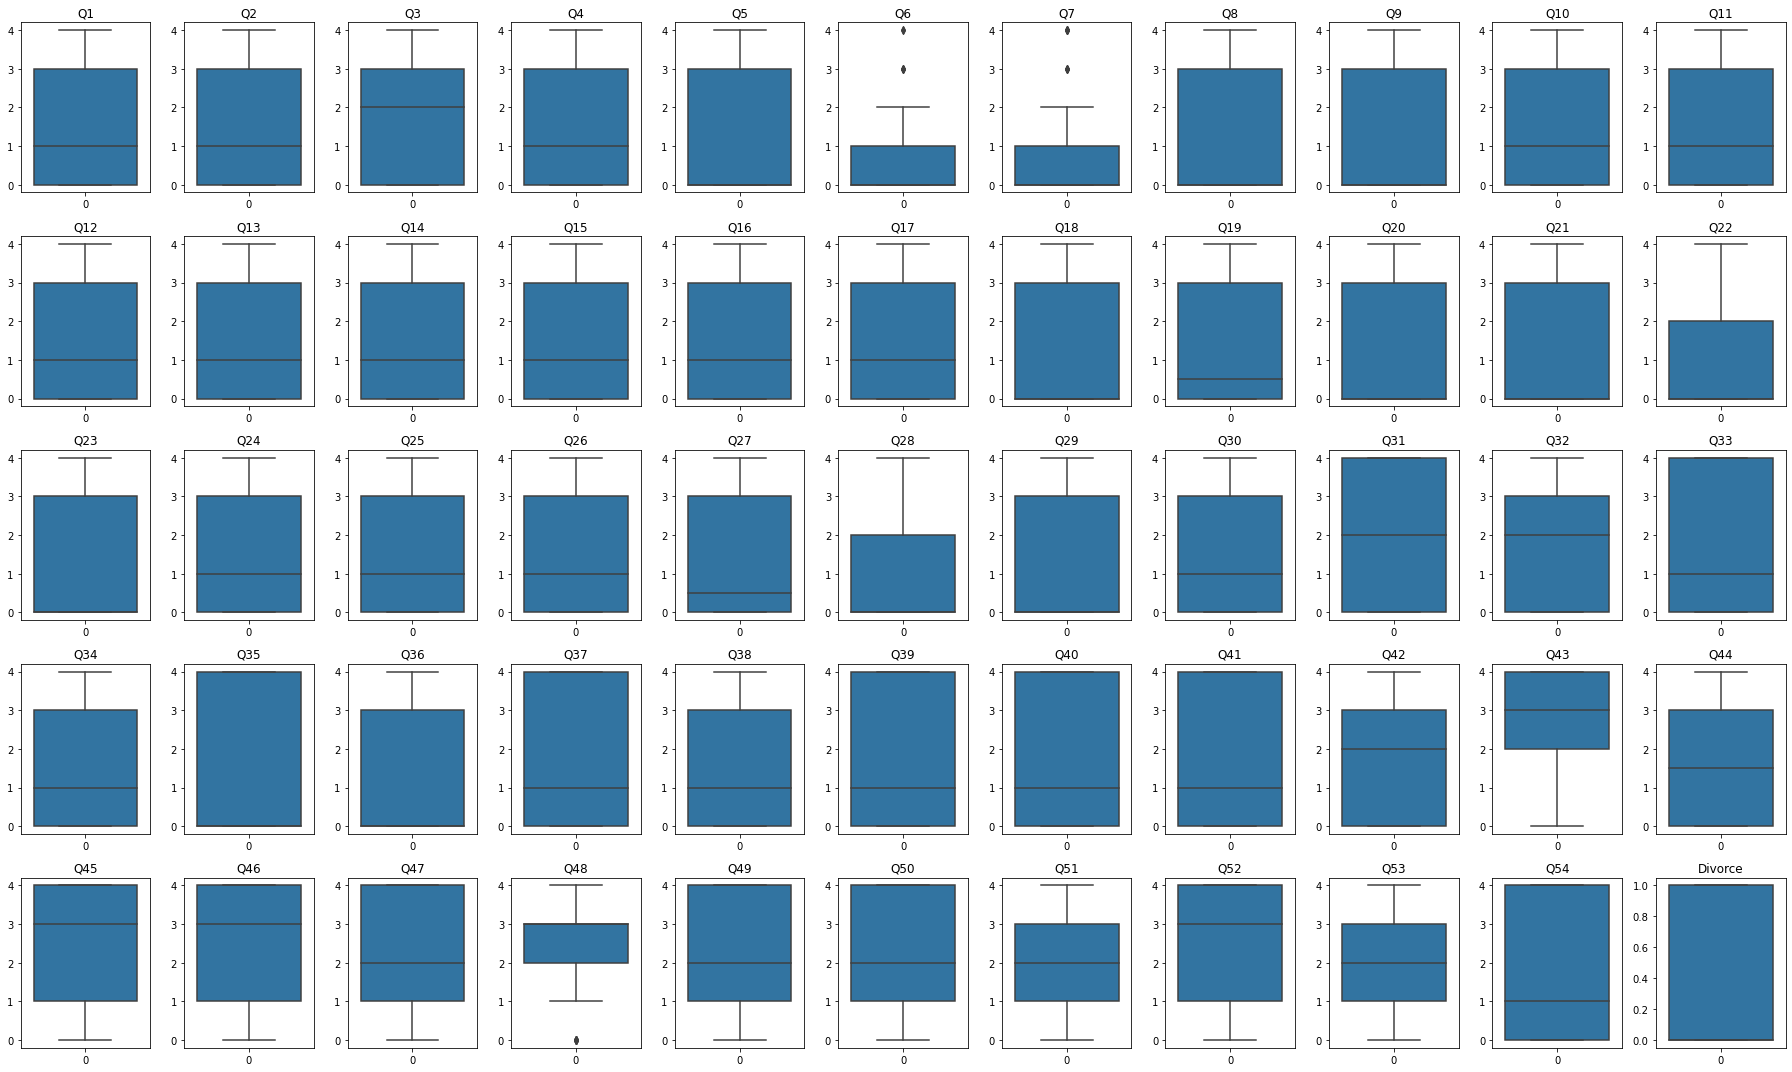

In [31]:
plt.figure(figsize=(25,15))
for i, column in enumerate(eda_data.columns):
    plt.subplot(5,11,i + 1)
    sns.boxplot(data= eda_data[column])
    plt.title(column)
    loc= pltic.MultipleLocator(base = 1.0)
    plt.subplot(5,11,i + 1).xaxis.set_major_locator(loc)
plt.tight_layout()
plt.show()

### Observation
The above chart shows that only the features, Q6, Q7 and Q48 has oulier. This won't really have effect on the model. 